<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Stacked Charts**


Estimated time needed: **45** minutes


In this lab, you will focus on visualizing data specifically using stacked charts. You will use SQL queries to extract the necessary data and apply stacked charts to analyze the composition and comparison within the data.


## Objectives


In this lab, you will perform the following:


- Visualize the composition of data using stacked charts.

- Compare multiple variables across different categories using stacked charts.

- Analyze trends within stacked chart visualizations.


## Setup: Downloading and Loading the Data
**Install the libraries**


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 125.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 129.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 114.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 133.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 52.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 108.8 MB/s eta 0:00:00


**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



### Step 1: Download the dataset


In [2]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-09-09 22:41:27--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  57.5MB/s    in 2.6s    

2025-09-09 22:41:30 (57.5 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



### Step 2: Import necessary libraries and load the dataset


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Load the data


In [3]:
df = pd.read_csv("survey-data.csv")

### Display the first few rows of the data to understand its structure


In [4]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


**Creating SQL DB To Query Data From Directly**

In [5]:
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Write the dataframe to the SQLite database
df.to_sql('main', conn, if_exists='replace', index=False)

65437

## MY PERSONAL STACK OF MAPPINGS TO USE THROUGHOUT FOR EASIER RENAMING

In [6]:
## This will hold all mapping data so one time run into Kernal
## And single time loading

# Mapping for SOPartFreq
mapping_partfreq = {
    'Daily or almost daily': 'Daily or Semi-Daily',
    'Multiple times per day': 'Multiple / Day',
    'A few times per week': 'Multiple / Week',
    'Less than once per month or monthly': 'Monthly',
    'A few times per month or weekly': 'Multiple / Month',
    'I have never participated in Q&A on Stack Overflow ': 'Never'
}

# Mapping of Age to String Grouping
mapping_age_text = {
    "Under 18 years old": 'Under 18',
    "18-24 years old": '18-24',
    "25-34 years old": '25-34',
    "35-44 years old": '35-44',
    "45-54 years old": '45-54',
    "55-64 years old": '55-64',
    "65 years or older": '65 Over',
    'Prefer not to say': np.nan
}

# Mapping of Age to int
mapping_age_int = {
    "Under 18 years old": 18,
    "18-24 years old": (18+24)/2,
    "25-34 years old": (25+34)/2,
    "35-44 years old": (35+44)/2,
    "45-54 years old": (45+54)/2,
    "55-64 years old": (55+64)/2,
    "65 years or older": 65,
    'Prefer not to say': np.nan
}

# Mapping of YearsProCode to int
mapping_codeyears = {
    'Less than 1 year': 0.5,
    'More than 50 years': 51
}

# Mapping of Employment
mapping_employment ={
    'Employed, full-time': 'Full-Time',
    'Independent contractor, freelancer, or self-employed': 'Independant',
    'Employed, part-time': 'Part-Time',
    'Retired': 'Retired',
    'Not employed, but looking for work': 'Unemployed'
}

# Mapping of Long Named Countries
mapping_country = {
    'United States of America': 'USA',
    'United Kingdom of Great Britain and Northern Ireland': 'UK',
    'Russian Federation': 'Russia'
}

# Mapping for Employment Type (Top 5) (DevType)
mapping_devtype = {
    'Developer, full-stack': 'Full-Stack Dev.',
    'Developer, back-end': 'Back-End Dev.',
    'Developer, front-end': 'Front-End Dev.',
    'Developer, desktop or enterprise applications': 'Desktop/Enterprise Dev.',
    'Developer, mobile': 'Mobile Dev.',
    'Developer, embedded applications or devices': 'Embedded Aps./Devices',
    'Other (please specify)': 'Other',
    'Engineering manager': 'Eng. Manager',
    'Data engineer': 'Data Eng.',
    'DevOps specialist': 'DevOps',
    'Data scientist or machine learning specialist': 'Data/ML Spec.',
    'Research & Development role': 'Research & Dev.',
    'Academic researcher': 'Academic Researcher',
    'Senior Executive (C-Suite, VP, etc.)': 'Senior Exec.',
    'Cloud infrastructure engineer': 'Cloud Infrastructure Eng.',
    'Developer, QA or test': 'QA/Testing Dev.',
    'Developer, game or graphics': 'Gaming/Graphics Dev.',
    'Developer, AI': 'AI Dev.',
    'Data or business analyst': 'Data/Business Analyst',
    'Engineer, site reliability': 'Site Reliability Eng.',
    'System administrator': 'System Admin.',
    'Project manager': 'Project Manager',
    'Security professional': 'Security Pro.',
    'Scientist': 'Scientist',
    'Student': 'Student',
    'Developer Experience': 'Dev. Experience',
    'Educator': 'Educator',
    'Blockchain': 'Blockchain',
    'Product manager': 'Product Manager',
    'Hardware Engineer': 'Hardware Eng.',
    'Developer Advocate': 'Advocate Dev.',
    'Database administrator': 'Database Admin.',
    'Designer': 'Designer',
    'Marketing or sales professional': 'Marketing/Sales Pro.'
}

### Task 1: Stacked Chart for Composition of Job Satisfaction Across Age Groups


##### 1. Stacked Chart of Median `JobSatPoints_6` and `JobSatPoints_7` for Different Age Groups


Visualize the composition of job satisfaction scores (`JobSatPoints_6` and `JobSatPoints_7`) across various age groups. This will help in understanding the breakdown of satisfaction levels across different demographics.



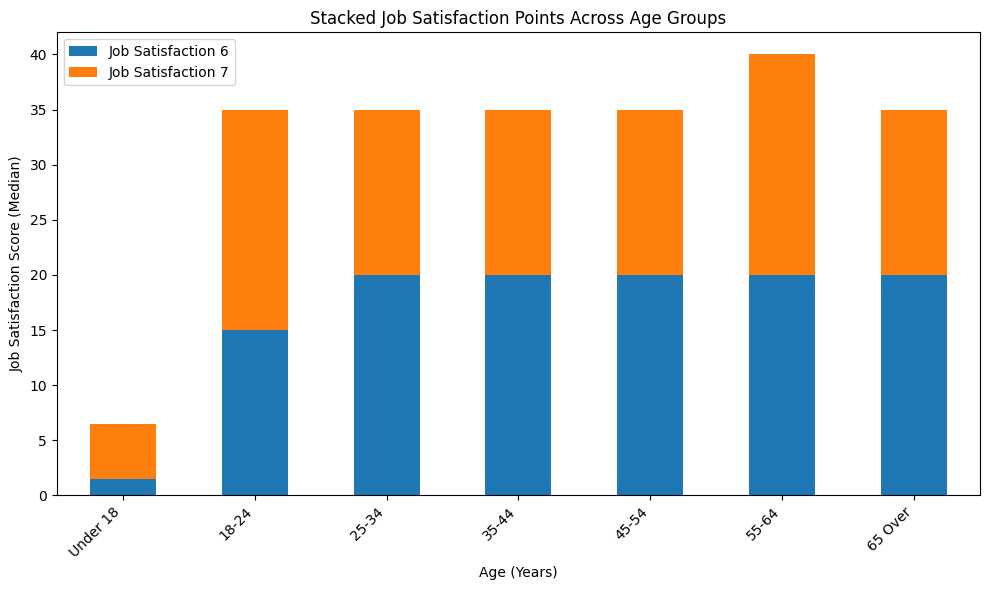

In [31]:
## Write your code here
query ='''
SELECT Age, JobSatPoints_6, JobSatPoints_7
FROM main
WHERE Age IS NOT NULL
AND JobSatPoints_6 IS NOT NULL
AND JobSatPoints_7 IS NOT NULL
'''
df = pd.read_sql_query(query, conn)

# Cleaning Data
df['Age'] = df['Age'].map(mapping_age_text)
age_groups = ['Under 18', '18-24', '25-34', '35-44', '45-54',
              '55-64', '65 Over']
df['Age'] = pd.Categorical(df['Age'], categories=age_groups, ordered=True)
df_group = df.groupby('Age', observed=False)[['JobSatPoints_6', 'JobSatPoints_7']].median()
df_group = df_group.rename(columns={'JobSatPoints_6': 'Job Satisfaction 6', 'JobSatPoints_7': 'Job Satisfaction 7'})

# Plotting Data
df_group.plot(kind='bar',
              stacked=True,
              figsize=(10,6)
             )
plt.title('Stacked Job Satisfaction Points Across Age Groups')
plt.xlabel('Age (Years)')
plt.ylabel('Job Satisfaction Score (Median)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### Stacked Chart of `JobSatPoints_6` and `JobSatPoints_7` for Employment Status


Create a stacked chart to compare job satisfaction (`JobSatPoints_6` and `JobSatPoints_7`) across different employment statuses. This will show how satisfaction varies by employment type.


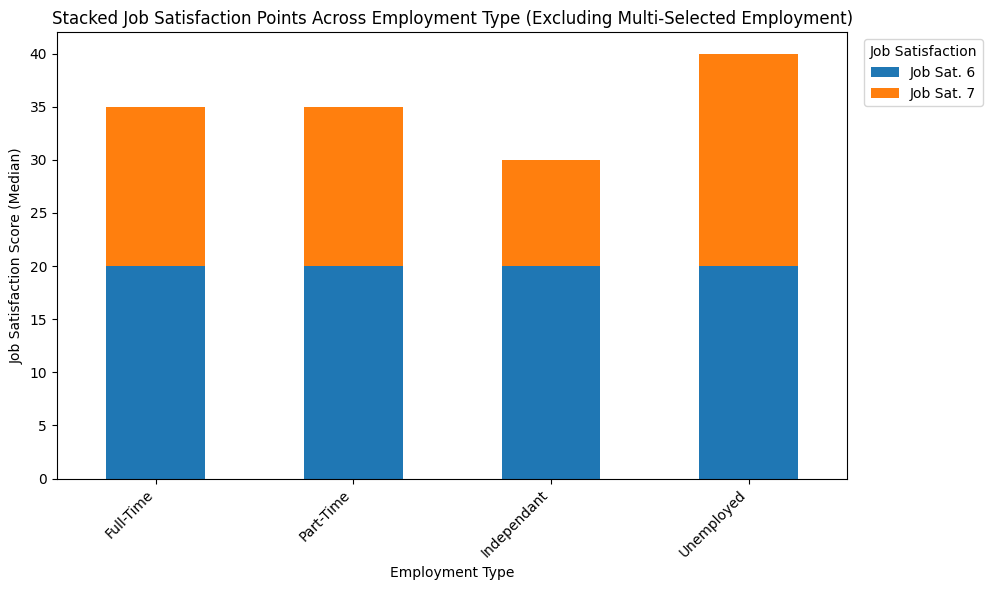

In [57]:
## Write your code here
query ='''
SELECT Employment, JobSatPoints_6, JobSatPoints_7
FROM main
WHERE Employment NOT LIKE '%;%'
AND JobSatPoints_6 IS NOT NULL
AND JobSatPoints_7 IS NOT NULL
'''
df = pd.read_sql_query(query, conn)

# Cleaning Data
df['Employment'] = df['Employment'].map(mapping_employment)
df_filtered = df[df['Employment'] != 'Retired']
employment_group = ['Full-Time', 'Part-Time', 'Independant', 'Unemployed']
df_filtered['Employment'] = pd.Categorical(df_filtered['Employment'], categories=employment_group, ordered=True)
df_group = df_filtered.groupby('Employment', observed=False)[['JobSatPoints_6', 'JobSatPoints_7']].median()
df_group = df_group.rename(columns={'JobSatPoints_6': 'Job Sat. 6', 'JobSatPoints_7': 'Job Sat. 7'})


# Plotting Data
df_group.plot(kind='bar',
              stacked=True,
              figsize=(10,6)
             )
plt.title('Stacked Job Satisfaction Points Across Employment Type (Excluding Multi-Selected Employment)')
plt.xlabel('Employment Type')
plt.ylabel('Job Satisfaction Score (Median)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Job Satisfaction', bbox_to_anchor=(1.18, 1), loc='upper right')
plt.tight_layout()
plt.show()

### Task 2: Stacked Chart for Compensation and Job Satisfaction by Age Group


##### This stacked chart visualizes the composition of compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) specifically for respondents aged 30-35.


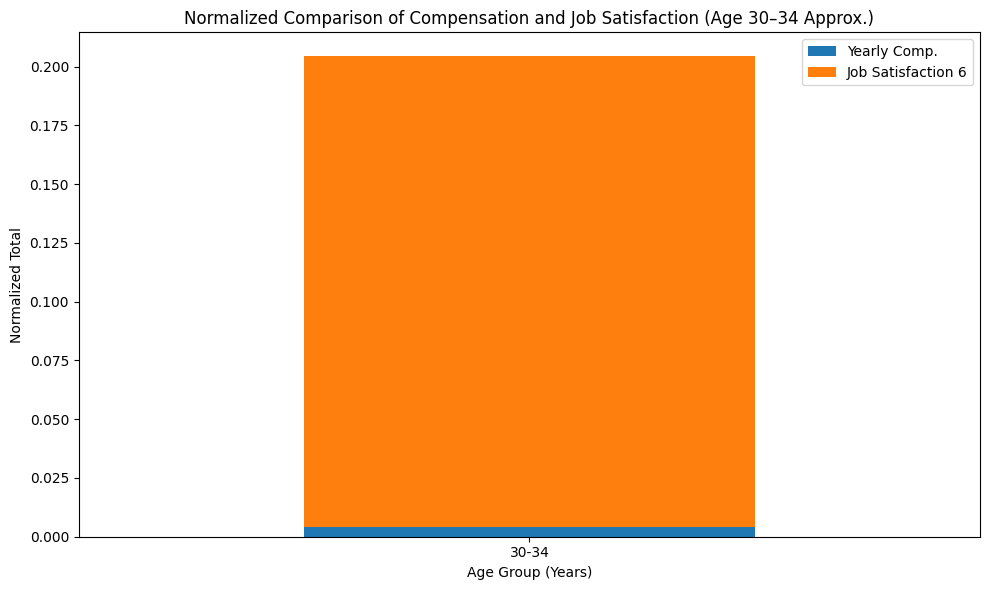

In [22]:
## Write your code here
query ='''
SELECT Age, ConvertedCompYearly, JobSatPoints_6
FROM main
WHERE Age = "25-34 years old"
AND ConvertedCompYearly IS NOT NULL
AND JobSatPoints_6 IS NOT NULL
'''
df = pd.read_sql_query(query, conn)

# Cleaning Data
df['JobSatPoints_6_normalized'] = (df['JobSatPoints_6'] - df['JobSatPoints_6'].min()) / (df['JobSatPoints_6'].max() - df['JobSatPoints_6'].min())
df['ConvertedCompYearly_normalized'] = (df['ConvertedCompYearly'] - df['ConvertedCompYearly'].min()) / (df['ConvertedCompYearly'].max() - df['ConvertedCompYearly'].min())
df_group = df.groupby('Age', observed=False)[['ConvertedCompYearly_normalized', 'JobSatPoints_6_normalized']].median()
df_group = df_group.rename(index={'25-34 years old': '30-34'}, columns={'JobSatPoints_6_normalized': 'Job Satisfaction 6', 'ConvertedCompYearly_normalized': 'Yearly Comp.'})

# Plotting Data
df_group.plot(kind='bar',
              stacked=True,
              figsize=(10,6)
             )
plt.title('Normalized Comparison of Compensation and Job Satisfaction (Age 30–34 Approx.)')
plt.xlabel('Age Group (Years)')
plt.ylabel('Normalized Total')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

##### Stacked Chart of Median Compensation and Job Satisfaction Across Age Group


Compare the median compensation and job satisfaction metrics across different age groups. This helps visualize how compensation and satisfaction levels differ by age.


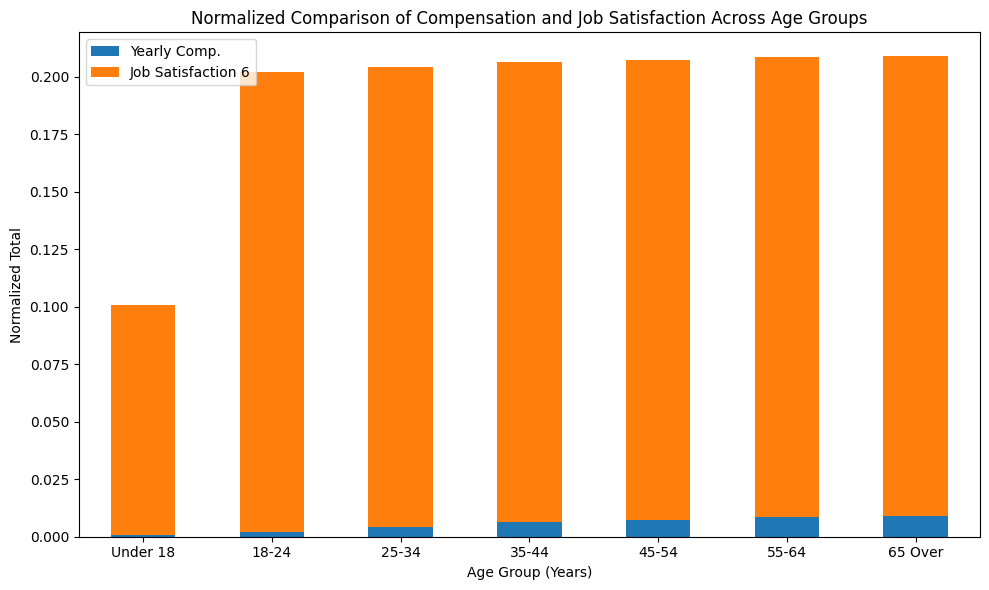

In [27]:
## Write your code here
query ='''
SELECT Age, ConvertedCompYearly, JobSatPoints_6
FROM main
WHERE Age IS NOT NULL
AND ConvertedCompYearly IS NOT NULL
AND JobSatPoints_6 IS NOT NULL
'''
df = pd.read_sql_query(query, conn)

# Cleaning Data
df['Age'] = df['Age'].map(mapping_age_text)
age_groups = ['Under 18', '18-24', '25-34', '35-44', '45-54',
              '55-64', '65 Over']
df['Age'] = pd.Categorical(df['Age'], categories=age_groups, ordered=True)
df['JobSatPoints_6_normalized'] = (df['JobSatPoints_6'] - df['JobSatPoints_6'].min()) / (df['JobSatPoints_6'].max() - df['JobSatPoints_6'].min())
df['ConvertedCompYearly_normalized'] = (df['ConvertedCompYearly'] - df['ConvertedCompYearly'].min()) / (df['ConvertedCompYearly'].max() - df['ConvertedCompYearly'].min())
df_group = df.groupby('Age', observed=False)[['ConvertedCompYearly_normalized', 'JobSatPoints_6_normalized']].median()
df_group = df_group.rename(columns={'JobSatPoints_6_normalized': 'Job Satisfaction 6', 'ConvertedCompYearly_normalized': 'Yearly Comp.'})

# Plotting Data
df_group.plot(kind='bar',
              stacked=True,
              figsize=(10,6)
             )
plt.title('Normalized Comparison of Compensation and Job Satisfaction Across Age Groups')
plt.xlabel('Age Group (Years)')
plt.ylabel('Normalized Total')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Task 3: Comparing Data Using Stacked Charts


##### 1. Stacked Chart of Preferred Databases by Age Group




Visualize the top databases that respondents from different age groups wish to learn. Create a stacked chart to show the proportion of each database in each age group.


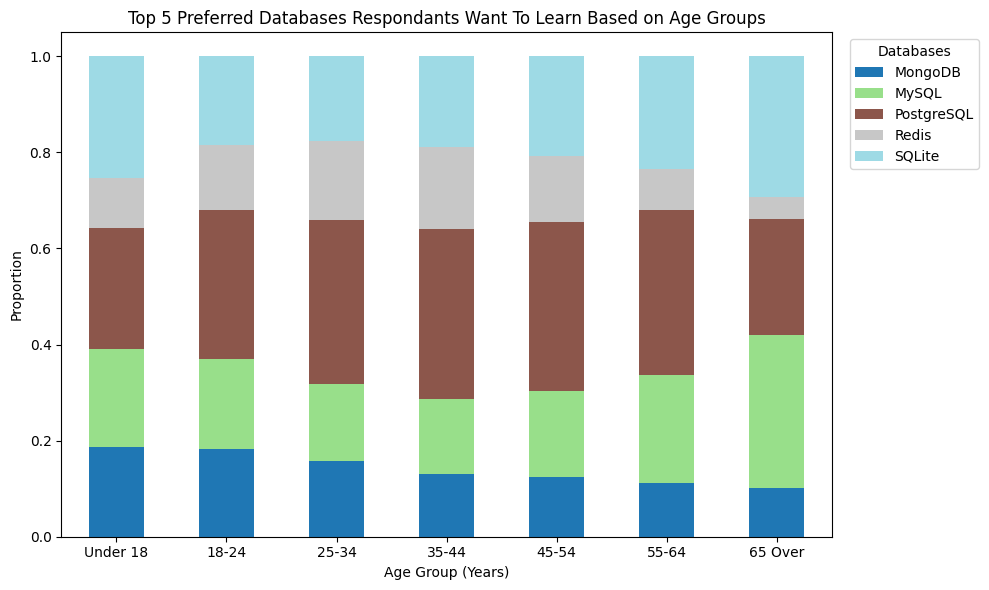

In [48]:
## Write your code here
query ='''
SELECT Age, DatabaseWantToWorkWith
FROM main
WHERE Age IS NOT NULL
AND DatabaseWantToWorkWith IS NOT NULL
'''
df = pd.read_sql_query(query, conn)

# Cleaning Data
df['Age'] = df['Age'].map(mapping_age_text)
age_groups = ['Under 18', '18-24', '25-34', '35-44', '45-54',
              '55-64', '65 Over']
df['Age'] = pd.Categorical(df['Age'], categories=age_groups, ordered=True)
df['DatabaseWantToWorkWith'] = df['DatabaseWantToWorkWith'].str.split(';')
df_exploded = df.explode('DatabaseWantToWorkWith')
top5_dblist = df_exploded['DatabaseWantToWorkWith'].value_counts().head(5).index
df_filtered = df_exploded[df_exploded['DatabaseWantToWorkWith'].isin(top5_dblist)]
df_group = df_filtered.groupby(['Age','DatabaseWantToWorkWith'], observed=False).size().unstack()
df_group = df_group.div(df_group.sum(axis=1), axis=0)

# Plotting Data
df_group.plot(kind='bar',
              stacked=True,
              figsize=(10,6),
              colormap='tab20'
             )
plt.title('Top 5 Preferred Databases Respondants Want To Learn Based on Age Groups')
plt.xlabel('Age Group (Years)')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='Databases', bbox_to_anchor=(1.20,1), loc='upper right')
plt.tight_layout()
plt.show()

##### 2. Stacked Chart of Employment Type by Job Satisfaction


Analyze the distribution of employment types within each job satisfaction level using a stacked chart. This will provide insights into how employment types are distributed across various satisfaction ratings.


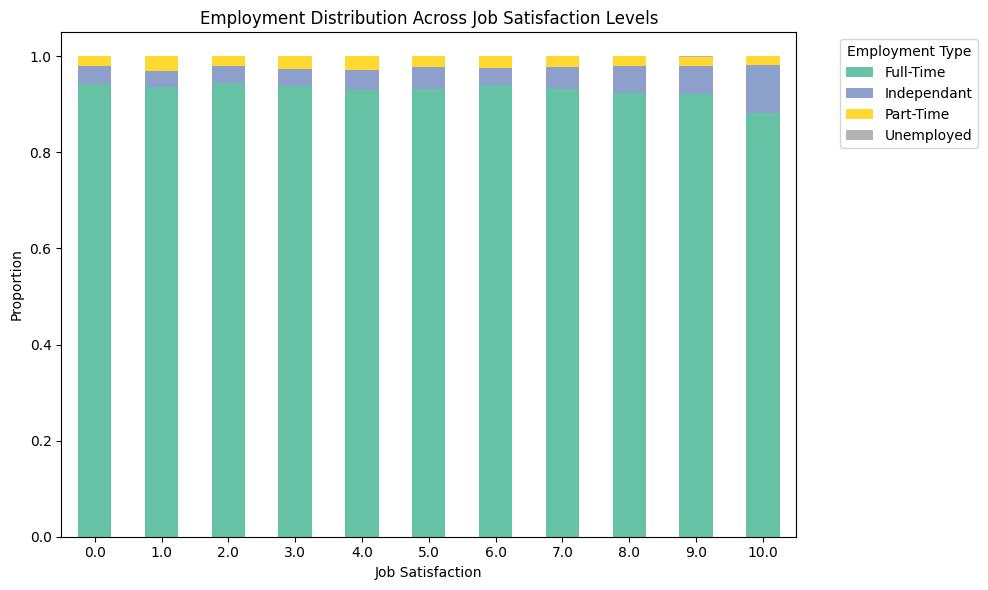

In [63]:
## Write your code here
query = '''
SELECT Employment, JobSat
FROM main
WHERE Employment NOT LIKE '%;%'
AND JobSat IS NOT NULL
'''
df = pd.read_sql_query(query, conn)

# Cleaning data
df['Employment'] = df['Employment'].map(mapping_employment)
df.dropna(subset=['Employment'], inplace=True)
df_group = df.groupby(['JobSat', 'Employment'], observed=False).size().unstack().fillna(0)
df_group = df_group.div(df_group.sum(axis=1), axis=0)  # normalize to proportions

# Plotting Data
df_group.plot(kind='bar', stacked=True, figsize=(10,6), colormap='Set2')
plt.title('Employment Distribution Across Job Satisfaction Levels')
plt.xlabel('Job Satisfaction')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



**Interpretation**

The stacked chart shows that employment types are fairly evenly distributed across job satisfaction levels. This suggests that job satisfaction may not be directly tied to employment status alone. For example, full-time employees make up a similar proportion across both high and low satisfaction categories. This may imply that job satisfaction is influenced more by individual factors or workplace environment rather than just employment type.

### Task 4: Exploring Technology Preferences Using Stacked Charts


##### 1. Stacked Chart for Preferred Programming Languages by Age Group


Analyze how programming language preferences (`LanguageAdmired`) vary across age groups.


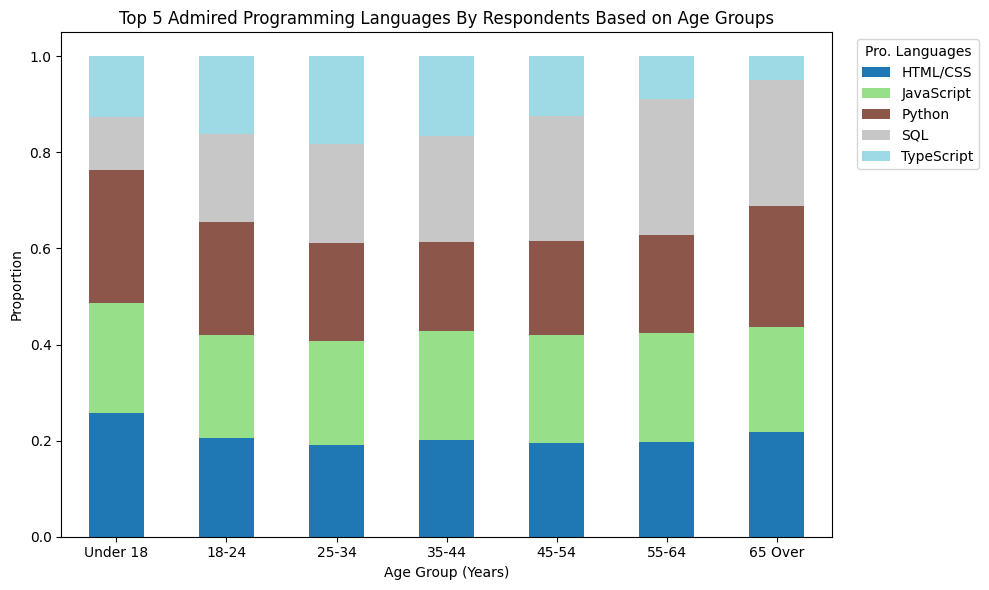

In [66]:
## Write your code here
# Pulling Data
query = '''
SELECT Age, LanguageAdmired
FROM main
WHERE Age IS NOT NULL
AND LanguageAdmired IS NOT NULL
'''
df = pd.read_sql_query(query, conn)

# Cleaning Data
df['Age'] = df['Age'].map(mapping_age_text)
age_groups = ['Under 18', '18-24', '25-34', '35-44', '45-54',
              '55-64', '65 Over']
df['Age'] = pd.Categorical(df['Age'], categories=age_groups, ordered=True)
df['LangAdList'] = df['LanguageAdmired'].str.split(';')
df_exploded = df.explode('LangAdList')
df_exploded['LangAdList'] = df_exploded['LangAdList'].str.strip()
top5_langad = df_exploded['LangAdList'].value_counts().head(5).index
df_filtered = df_exploded[df_exploded['LangAdList'].isin(top5_langad)]
df_group = df_filtered.groupby(['Age','LangAdList'], observed=False).size().unstack()
df_group = df_group.div(df_group.sum(axis=1), axis=0)

# Plotting Data
df_group.plot(kind='bar',
              stacked=True,
              figsize=(10,6),
              colormap='tab20'
             )
plt.title('Top 5 Admired Programming Languages By Respondents Based on Age Groups')
plt.xlabel('Age Group (Years)')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='Pro. Languages', bbox_to_anchor=(1.20,1), loc='upper right')
plt.tight_layout()
plt.show()

##### 2. Stacked Chart for Technology Adoption by Employment Type


Explore how admired platforms (`PlatformAdmired`) differ across employment types (e.g., full-time, freelance)


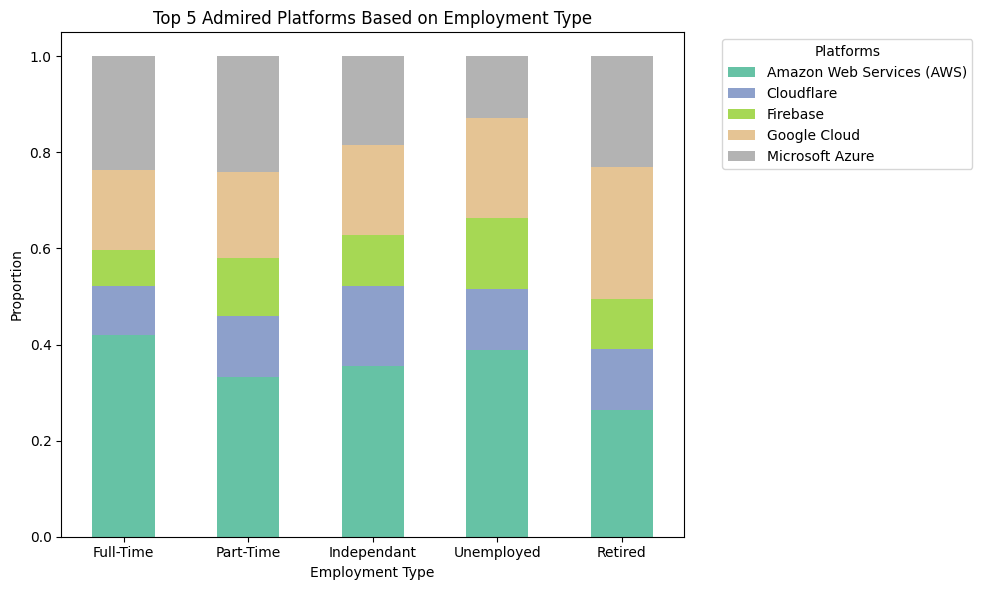

In [74]:
## Write your code here
query = '''
SELECT Employment, PlatformAdmired
FROM main
WHERE Employment NOT LIKE '%;%'
AND PlatformAdmired IS NOT NULL
'''
df = pd.read_sql_query(query, conn)
df

# Cleaning data
df['Employment'] = df['Employment'].map(mapping_employment)
df.dropna(subset=['Employment'], inplace=True)
employment_group = ['Full-Time', 'Part-Time', 'Independant', 'Unemployed', 'Retired']
df['Employment'] = pd.Categorical(df['Employment'], categories=employment_group, ordered=True)
df['PlatAdList'] = df['PlatformAdmired'].str.split(';')
df_exploded = df.explode('PlatAdList')
df_exploded['PlatAdList'] = df_exploded['PlatAdList'].str.strip()
top5_platad = df_exploded['PlatAdList'].value_counts().head(5).index
df_filtered = df_exploded[df_exploded['PlatAdList'].isin(top5_platad)]
df_group = df_filtered.groupby(['Employment', 'PlatAdList'], observed=False).size().unstack().fillna(0)
df_group = df_group.div(df_group.sum(axis=1), axis=0)  # normalize to proportions

# Plotting Data
df_group.plot(kind='bar', stacked=True, figsize=(10,6), colormap='Set2')
plt.title('Top 5 Admired Platforms Based on Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='Platforms', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [75]:
# Final step is closing the DB connection
conn.close()

### Final Step: Review


In this lab, you focused on using stacked charts to understand the composition and comparison within the dataset. Stacked charts provided insights into job satisfaction, compensation, and preferred databases across age groups and employment types.


## Summary


After completing this lab, you will be able to:

- Use stacked charts to analyze the composition of data across categories, such as job satisfaction and compensation by age group.

- Compare data across different dimensions using stacked charts, enhancing your ability to communicate complex relationships in the data.

- Visualize distributions across multiple categories, such as employment type by satisfaction, to gain a deeper understanding of patterns within the dataset.


## Author:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
